In [1]:
import pandas as pd
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
import time


# Cargar el archivo CSV en un DataFrame
dfread = pd.read_csv("data/abstracts.csv")
df= dfread.head(1000)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\henry\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\henry\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from nltk.stem import PorterStemmer
# Inicializar el stemmer
stemmer = PorterStemmer()

# Definir una función para limpiar el texto
def clean_text(text):
    # Eliminar caracteres especiales y números
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Convertir el texto a minúsculas
    text = text.lower()
    
     # Remove leading and trailing white spaces
    text = text.strip()
    # Replace multiple spaces with a single space
    text = re.sub('\s+', ' ', text)

    # Tokenizar el texto en palabras
    words = word_tokenize(text)

    # Eliminar stopwords y aplicar stemming
    stop_words = set(stopwords.words('english'))
    #words = [word for word in words if word not in stop_words]
    stemmed_words = [stemmer.stem(word) for word in words if word not in stop_words]

    # Unir las palabras nuevamente en una cadena
    cleaned_text = ' '.join(stemmed_words)

    return cleaned_text

# Aplicar la función clean_text a la columna "abstract"
df['abstract_p'] = df['abstract'].apply(clean_text)




C:\Users\henry\AppData\Local\Temp\ipykernel_7784\3046351626.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abstract_p'] = df['abstract'].apply(clean_text)


In [3]:
#df = df.drop('Unnamed: 0', axis=1)
df
#print(df['abstract'].head())

,Unnamed: 0,index,cell_line,pubmedid,title,abstract,abstract_p
0,0,0,CVCL_0028,33040078,Splicing factor SF3B1 promotes endometrial can...,Although endometrial cancer is the most common...,although endometri cancer common cancer femal ...
1,1,1,CVCL_0028,34476599,Sirtuin 2 promotes cell stemness and MEK/ERK s...,Sirtuin 2 (SIRT2) is functionally important in...,sirtuin sirt function import cancer progress t...
2,2,2,CVCL_0028,35401936,Role of the prorenin receptor in endometrial c...,Endometrial cancer is the most diagnosed gynec...,endometri cancer diagnos gynecolog malign desp...
3,3,3,CVCL_0028,32431202,NLRC5 promotes cell migration and invasion by ...,NOD-like receptor family caspase recruitment d...,nod like receptor famili caspas recruit domain...
4,4,4,CVCL_0028,24526410,GRP78 mediates cell growth and invasiveness in...,Recent studies have indicated that endoplasmic...,recent studi indic endoplasm reticulum stress ...
...,...,...,...,...,...,...,...
995,995,11,CVCL_0F18,36200530,Development of a novel bioengineered 3D brain-...,Primary blast injury is caused by the direct i...,primari blast injuri caus direct impact overpr...
996,996,12,CVCL_0F18,32133675,Tomosyn regulates the small RhoA GTPase to con...,"Tomosyn, a protein encoded by syntaxin-1-bindi...",tomosyn protein encod syntaxin bind protein st...
997,997,0,CVCL_0F38,32197467,Elevated PDK1 Expression Drives PI3K/AKT/MTOR ...,"Resistance to radiotherapy (IR), with conseque...",resist radiotherapi ir consequ diseas recurr c...
998,998,1,CVCL_0F38,33165868,Establishment of a bladder cancer cell line ex...,Several experimental models including patient ...,sever experiment model includ patient biopsi a...


## Tf-idf 1 (Term frequency – Inverse document frequency)

In [4]:
# Inicializar el vectorizador TF-IDF
vectorizer = TfidfVectorizer()

# Aplicar TF-IDF a la columna "abstract_p"
tfidf_matrix = vectorizer.fit_transform(df['abstract_p'])


# Obtener las palabras (features) del vectorizador TF-IDF
features = vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a DataFrame / Convertir la matriz TF-IDF en un DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Imprimir el total de palabras y los primeros 3 registros de la columna "abstract_p"
print("Total de palabras:", len(features))
print(df['abstract_p'].head(2))
tfidf_df

Total de palabras: 6312
0    although endometri cancer common cancer femal ...
1    sirtuin sirt function import cancer progress t...
Name: abstract_p, dtype: object


,aa,aacr,aacrjourn,aadac,ab,abc,abca,abe,aberr,aberrantli,...,znf,zno,zo,zone,zonula,zr,zro,zta,zvad,zymographi
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.126996,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.042222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Tf-idf 2 (Term frequency – Inverse document frequency)

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of TfidfVectorizer /Crear una instancia de TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the 'abstract_p' column/# Ajustar el vectorizador en la columna 'abstract_p
vectorizer.fit(df['abstract_p'])

# Transform the 'abstract_p' column into TF-IDF features / Transformar la columna 'abstract_p' en características TF-IDF
tfidf_matrix = vectorizer.transform(df['abstract_p'])

# Convert the TF-IDF matrix to a DataFrame / Convertir la matriz TF-IDF en un DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Optional: Combine the TF-IDF DataFrame with the original DataFrame
#df_tfidf = pd.concat([df, tfidf_df], axis=1)


In [118]:
tfidf_df

,aa,aacr,aacrjourn,aadac,ab,abc,abca,abe,aberr,aberrantli,...,znf,zno,zo,zone,zonula,zr,zro,zta,zvad,zymographi
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.126996,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.042222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## REDUCCIÓN DE DIMENSIONES CON PCA

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

 # Step 2: Reduce dimensions using PCA
pca = PCA(n_components=5)  # Specify the number of desired dimensions
tfidf_pca = pca.fit_transform(tfidf_matrix.toarray())

# Create a new DataFrame with the PCA results
df_pca = pd.DataFrame(data=tfidf_pca)

# Print the final DataFrame with TF-IDF and PCA results
print(df_pca)

            0         1         2         3         4
0    0.021330  0.002110  0.015025  0.006705  0.011551
1    0.018874  0.029480  0.039721 -0.004917  0.009272
2    0.014725  0.014685  0.033568  0.000009  0.005754
3   -0.000093  0.020832  0.004789 -0.017289  0.006215
4   -0.028764 -0.056317  0.019719  0.058700  0.045315
..        ...       ...       ...       ...       ...
995 -0.107146 -0.016686 -0.074372 -0.089515 -0.232622
996 -0.075124  0.026638  0.043001 -0.037910 -0.033165
997  0.187182  0.145549  0.831970  0.061558 -0.104859
998  0.635705  0.056728 -0.031692  0.254603  0.021961
999 -0.415080  0.766531 -0.165861  0.259281  0.013236

[1000 rows x 5 columns]


In [7]:
# Concatenate the PCA results with the original DataFrame
df_final = pd.concat([df['cell_line'], df_pca], axis=1)
df_final

,cell_line,0,1,2,3,4
0,CVCL_0028,0.021330,0.002110,0.015025,0.006705,0.011551
1,CVCL_0028,0.018874,0.029480,0.039721,-0.004917,0.009272
2,CVCL_0028,0.014725,0.014685,0.033568,0.000009,0.005754
3,CVCL_0028,-0.000093,0.020832,0.004789,-0.017289,0.006215
4,CVCL_0028,-0.028764,-0.056317,0.019719,0.058700,0.045315
...,...,...,...,...,...,...
995,CVCL_0F18,-0.107146,-0.016686,-0.074372,-0.089515,-0.232622
996,CVCL_0F18,-0.075124,0.026638,0.043001,-0.037910,-0.033165
997,CVCL_0F38,0.187182,0.145549,0.831970,0.061558,-0.104859
998,CVCL_0F38,0.635705,0.056728,-0.031692,0.254603,0.021961


## SVDD SIN APLICAR PCA

In [121]:
#sin aplicar pca
from sklearn.svm import OneClassSVM
import numpy as np
# Step 3: Apply SVDD for outlier detection and subject identification

subjects = df['cell_line'].unique()

subject_centers = {}

subject_radii = {}


for subject in subjects:

    subject_indices = df[df['cell_line'] == subject].index


    # Extract TF-IDF vectors for the subject's texts

    subject_tfidf_matrix = tfidf_matrix[subject_indices]


    # Apply SVDD (OneClassSVM) for the subject's texts

    model = OneClassSVM(kernel='rbf', gamma='scale')

    model.fit(subject_tfidf_matrix)


    # Filter inliers for the subject

    inlier_indices = subject_indices[model.predict(subject_tfidf_matrix) == 1]

    inliers_df = df.loc[inlier_indices]


    # Calculate the center of the vectors for the subject

    subject_center = np.mean(subject_tfidf_matrix, axis=0)

    subject_centers[subject] = subject_center


    # Calculate the radius of the sphere that describes the subject

    subject_radius = np.max(np.linalg.norm(subject_tfidf_matrix - subject_center, axis=1))

    subject_radii[subject] = subject_radius


# Filter the DataFrame to include only the inliers

df_inliers = df.loc[inliers_df.index]

## CENTROIDES SIN PCA

In [98]:
# crentroides sin pca
import pandas as pd
import numpy as np

# Crear una lista para almacenar los resultados
result_data = []

# Llenar la lista con los resultados
for subject in subjects:
    center = np.squeeze(subject_centers[subject])
    radius = np.squeeze(subject_radii[subject])
    result_data.append({'cell_line': subject, 'center': center, 'radius': radius})

# Crear el dataframe a partir de la lista de resultados
result_df = pd.DataFrame(result_data)

# Imprimir el dataframe de resultados
result_df

,cell_line,center,radius
0,CVCL_0028,[[[[[0. 0. 0. ... 0. 0. 0.]]]]],0.970326
1,CVCL_0080,[[[[[0.00524472 0. 0.00491065 ... 0. ...,0.966721
2,CVCL_0081,[[[[[0. 0. 0. ... 0. 0. 0.]]]]],1.006079
3,CVCL_0082,[[[[[0. 0. 0. ... 0. 0. 0.]]]]],0.935479
4,CVCL_0107,[[[[[0. 0. 0. ... 0. ...,0.945810
5,CVCL_0110,[[[[[0. 0.01325849 0.00280989 ... 0.00...,0.967935
6,CVCL_0113,[[[[[0. 0.00789801 0. ... 0. ...,1.016886
7,CVCL_0115,[[[[[0.00343351 0.01567864 0.00519041 ... 0. ...,1.005984
8,CVCL_0128,[[[[[0. 0. 0. ... 0. 0. 0.]]]]],0.689254


## MATRIZ DISTANCIA

In [122]:
import numpy as np
from scipy.spatial.distance import euclidean

n = len(result_data)  # Number of observations
distance_matrix = np.zeros((n, n))  # Initialize an empty distance matrix

# Calculate pairwise distances using a for loop
for i in range(n):
    for j in range(i + 1, n):
        center_i = np.asarray(result_data[i]['center'])
        center_j = np.asarray(result_data[j]['center'])
        distance = euclidean(center_i.flatten(), center_j.flatten())  # Euclidean distance between flattened 'center' values
        distance_matrix[i, j] = distance
        distance_matrix[j, i] = distance

# Print the distance matrix
print(distance_matrix)

[[0.         0.45631905 0.5613021  0.5897573  0.52535863 0.45782667
  0.53508192 0.54040617 0.77043266]
 [0.45631905 0.         0.53761374 0.56366902 0.49212528 0.44050882
  0.51203473 0.52715329 0.75334541]
 [0.5613021  0.53761374 0.         0.62774769 0.55896369 0.54307641
  0.60847986 0.58951738 0.81663028]
 [0.5897573  0.56366902 0.62774769 0.         0.57817725 0.55239639
  0.59511806 0.61026155 0.83098788]
 [0.52535863 0.49212528 0.55896369 0.57817725 0.         0.49094617
  0.56397053 0.55990285 0.79182214]
 [0.45782667 0.44050882 0.54307641 0.55239639 0.49094617 0.
  0.50075712 0.52107763 0.75261179]
 [0.53508192 0.51203473 0.60847986 0.59511806 0.56397053 0.50075712
  0.         0.5797949  0.79364513]
 [0.54040617 0.52715329 0.58951738 0.61026155 0.55990285 0.52107763
  0.5797949  0.         0.80470929]
 [0.77043266 0.75334541 0.81663028 0.83098788 0.79182214 0.75261179
  0.79364513 0.80470929 0.        ]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Compute the linkage matrix
Z = linkage(distance_matrix, method='average')

# Plot the dendrogram
plt.figure(figsize=(1, 6))
dendrogram(Z)
plt.xlabel('Subjects')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()


## SVDD APLICANDO PCA

In [123]:
# aplicando pca
from sklearn.svm import OneClassSVM
import numpy as np

# Step 3: Apply SVDD for outlier detection and subject identification

subjects = df['cell_line'].unique()

subject_centers_pca = {}
subject_radii_pca = {}

for subject in subjects:
    subject_indices = df[df['cell_line'] == subject].index

    # Extract TF-IDF vectors for the subject's texts
    subject_tfidf_matrix_pca = tfidf_pca[subject_indices]

    # Apply SVDD (OneClassSVM) for the subject's texts
    model = OneClassSVM(kernel='rbf', gamma='scale')
    model.fit(subject_tfidf_matrix_pca)

    # Filter inliers for the subject
    inlier_indices = subject_indices[model.predict(subject_tfidf_matrix_pca) == 1]
    inliers_df = df.loc[inlier_indices]

    # Calculate the center of the vectors for the subject
    subject_center_pca = np.mean(subject_tfidf_matrix_pca, axis=0)
    subject_centers_pca[subject] = subject_center_pca

    # Calculate the radius of the sphere that describes the subject
    subject_radius_pca = np.max(np.linalg.norm(subject_tfidf_matrix_pca - subject_center_pca, axis=1))
    subject_radii_pca[subject] = subject_radius_pca

# Filter the DataFrame to include only the inliers
df_inliers = df.loc[inliers_df.index]

## CENTROIDES CON PCA

In [65]:
import pandas as pd
import numpy as np

# Crear una lista para almacenar los resultados
result_data = []

# Llenar la lista con los resultados
for subject in subjects:
    center = np.squeeze(subject_centers_pca[subject])
    radius = np.squeeze(subject_radii_pca[subject])
    result_data.append({'cell_line': subject, 'center': center, 'radius': radius})

# Crear el dataframe a partir de la lista de resultados
result_df_pca = pd.DataFrame(result_data)

# Imprimir el dataframe de resultados
result_df_pca


,cell_line,center,radius
0,CVCL_0028,"[-0.04874617332841719, -0.037412345895565934, ...",0.970326
1,CVCL_0080,"[-0.039344458571759756, -0.03938887554072461, ...",0.966721
2,CVCL_0081,"[0.35583132995028627, -0.0506262717147101, 0.0...",1.006079
3,CVCL_0082,"[-0.030869281785014902, -0.032233927353455115,...",0.935479
4,CVCL_0107,"[0.019415806276220835, -0.04185095698181659, -...",0.945810
5,CVCL_0110,"[-0.06024666914918857, -0.053808059906325756, ...",0.967935
6,CVCL_0113,"[-0.1838964352918634, -0.10627631696567605, 0....",1.016886
7,CVCL_0115,"[-0.020102935077410823, 0.34974972357270884, 0...",1.005984
8,CVCL_0128,"[-0.04087553500358537, -0.0196960819541918, -0...",0.689254


## MATRIZ DISTANCIA CON PCA

In [125]:
import numpy as np
from scipy.spatial.distance import euclidean

n = len(result_data)  # Number of observations
distance_matrix = np.zeros((n, n))  # Initialize an empty distance matrix

# Calculate pairwise distances using a for loop
for i in range(n):
    for j in range(i + 1, n):
        center_i = np.asarray(result_data[i]['center'])
        center_j = np.asarray(result_data[j]['center'])
        distance = euclidean(center_i.flatten(), center_j.flatten())                  # Euclidean distance between flattened 'center' values
        distance_matrix[i, j] = distance
        distance_matrix[j, i] = distance

# Print the distance matrix
print(distance_matrix)


[[0.         0.45631905 0.5613021  0.5897573  0.52535863 0.45782667
  0.53508192 0.54040617 0.77043266]
 [0.45631905 0.         0.53761374 0.56366902 0.49212528 0.44050882
  0.51203473 0.52715329 0.75334541]
 [0.5613021  0.53761374 0.         0.62774769 0.55896369 0.54307641
  0.60847986 0.58951738 0.81663028]
 [0.5897573  0.56366902 0.62774769 0.         0.57817725 0.55239639
  0.59511806 0.61026155 0.83098788]
 [0.52535863 0.49212528 0.55896369 0.57817725 0.         0.49094617
  0.56397053 0.55990285 0.79182214]
 [0.45782667 0.44050882 0.54307641 0.55239639 0.49094617 0.
  0.50075712 0.52107763 0.75261179]
 [0.53508192 0.51203473 0.60847986 0.59511806 0.56397053 0.50075712
  0.         0.5797949  0.79364513]
 [0.54040617 0.52715329 0.58951738 0.61026155 0.55990285 0.52107763
  0.5797949  0.         0.80470929]
 [0.77043266 0.75334541 0.81663028 0.83098788 0.79182214 0.75261179
  0.79364513 0.80470929 0.        ]]


C:\Users\henry\AppData\Local\Temp\ipykernel_6184\251422438.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method='average')


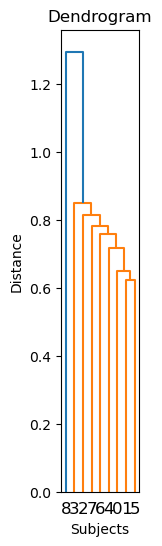

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Compute the linkage matrix
Z = linkage(distance_matrix, method='average')

# Plot the dendrogram
plt.figure(figsize=(1, 6))
dendrogram(Z)
plt.xlabel('Subjects')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()
